## Extended Persistence

This code in this file is based on the Extended Persistance tutorial by Mathieu Carrière. 

The GUDHI TDA tutorials can be found here: https://github.com/GUDHI/TDA-tutorial/tree/master

In [32]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D

In Gudhi, filtered simplicial complexes are encoded through a data structure called **simplex tree**.

Use the `insert()` method to add simplices. The `insert()` method returns `FALSE` if we try to insert an existing simplex.

In [33]:
# empty simplicial complex 
st = gd.SimplexTree()

# use insert() method to add simplices to st
# insert automtically adds required sub-simplices
st.insert([0,1])          # adding a 1-simplex
st.insert([1,2]) 
st.insert([1,3]) 
st.insert([2,4]) 
st.insert([3,4]) 
st.insert([4,5]) 
st.insert([2,6]) 
st.insert([3,7]) 
st.assign_filtration([0], 0.)
st.assign_filtration([1], 1.)
st.assign_filtration([2], 2.)
st.assign_filtration([3], 3.)
st.assign_filtration([4], 4.)
st.assign_filtration([5], 5.)
st.assign_filtration([6], 0.5)
st.assign_filtration([7], 4.5)
_ = st.make_filtration_non_decreasing()

Use the method `get_filtration()` followed by for loop to obtain all simplices and fitration values of an object of type `SimplexTree`.

In [34]:
# st_gen is generator to obtain all simplices
# notice that all filtration values are set to 0
st_gen = st.get_filtration()

for splx in st_gen:
    print(splx)

([0], 0.0)
([6], 0.5)
([1], 1.0)
([0, 1], 1.0)
([2], 2.0)
([1, 2], 2.0)
([2, 6], 2.0)
([3], 3.0)
([1, 3], 3.0)
([4], 4.0)
([2, 4], 4.0)
([3, 4], 4.0)
([7], 4.5)
([3, 7], 4.5)
([5], 5.0)
([4, 5], 5.0)


Different method calls can be used to retrieve different descriptors of the simplicial complex

In [35]:
# dimension of the complex
st.dimension()

# num of vertices or 0-simplices
st.num_vertices()

# num. of simplices
st.num_simplices()

# check the existance of a specific simplex
st.find([1,2])

# obtain d-skeleton i.e. union of all simplices of dim less than or equal to d
# st1 is generator object
st1 = st.get_skeleton(1)
for splx in st1:
    print(splx)


# filtration value associated with particular simplex
print(st.filtration([1,2,3]))

([0, 1], 1.0)
([0], 0.0)
([1, 2], 2.0)
([1, 3], 3.0)
([1], 1.0)
([2, 4], 4.0)
([2, 6], 2.0)
([2], 2.0)
([3, 4], 4.0)
([3, 7], 4.5)
([3], 3.0)
([4, 5], 5.0)
([4], 4.0)
([5], 5.0)
([6], 0.5)
([7], 4.5)
inf


Let `st` be an object of type `SimplexTree`. There are two ways of associating filter values to simplices:
1. `st.insert( , filteration =  )`: to assign a filter value while introducing a simplex into the complex.
2. `st.assign_filtration()`: to modify the existing filtration value of a simplex already included in the complex.

In [24]:
#st.insert([4], filtration= 1)
#st.assign_filtration([1,2,3], filtration=3)
#st_gen = st.get_filtration()

#for smplx in st_gen:
#    print(smplx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([2, 3], 0.0)
([4], 1.0)
([1, 2, 3], 3.0)


In [31]:
# st.make_filtration_non_decreasing()
# st_gen = st.get_filtration()

# for smplx in st_gen:
#    print(smplx)

([0], 0.0)
([6], 0.5)
([1], 1.0)
([0, 1], 1.0)
([2], 2.0)
([1, 2], 2.0)
([2, 6], 2.0)
([3], 3.0)
([1, 3], 3.0)
([4], 4.0)
([2, 4], 4.0)
([3, 4], 4.0)
([7], 4.5)
([3, 7], 4.5)
([5], 5.0)
([4, 5], 5.0)


Visualizing the simplicial complex. In our example, the complex is a graph.

In [42]:
# initialize an empty graph G and add simplices
G = nx.Graph()
for (splx,_) in st.get_skeleton(1):
    if len(splx) == 1:
        G.add_node(splx[0])
    if len(splx) == 2:
        G.add_edge(splx[0], splx[1])

G.nodes()
G.edges()

EdgeView([(0, 1), (1, 2), (1, 3), (2, 4), (2, 6), (3, 4), (3, 7), (4, 5)])

In [43]:
pos = {}
for idxv, v in enumerate(G.nodes()):
    y = st.filtration([v])
    if v == 2:
        x = -1.
    elif v == 6:
        x = -2.
    elif v == 3:
        x = 1.
    elif v == 7:
        x = 2.
    else:
        x = 0.
    pos[v] = [x,y]

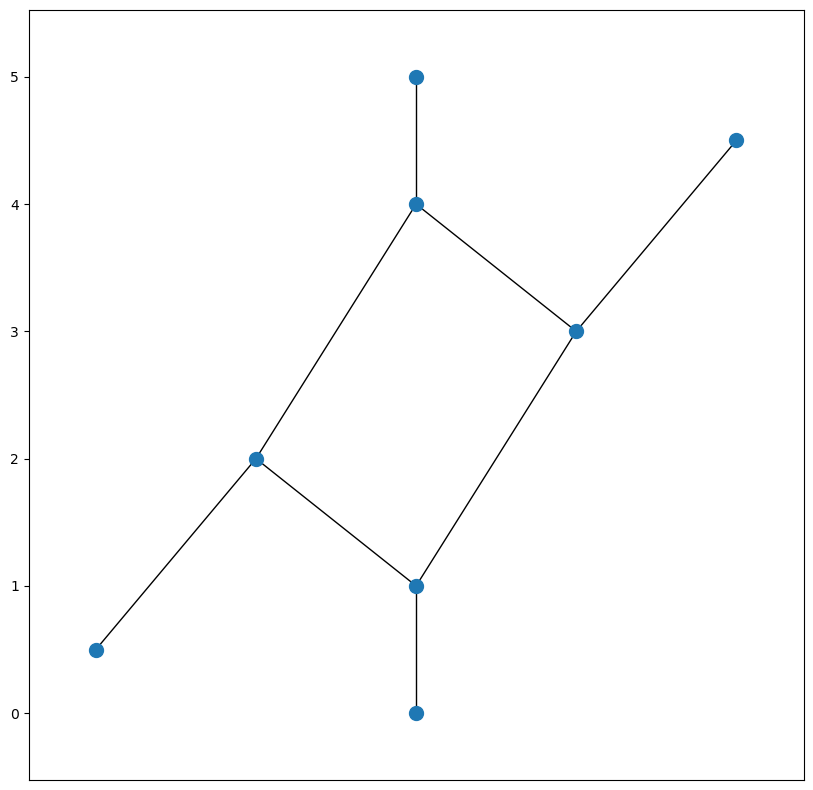

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
nx.draw(G, pos=pos, node_size=100, ax=ax)
limits=plt.axis('on')
ax.tick_params(left=True, bottom=False, labelleft=True, labelbottom=False)
plt.show()